In [2]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
from LabFuncs import *
from Params import *
from HaloFuncs import *
from WIMPFuncs import *
# Set plot rc params
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#######

# v range
n = 100
v = linspace(0.1,850.0,n)
day = 67.0

# Halo params
HaloModel = SHMpp
v0 = HaloModel.RotationSpeed
v_esc = HaloModel.EscapeSpeed
beta = HaloModel.SausageBeta
v_lab = LabVelocitySimple(day)

# Load shards
dat = loadtxt('../shards.txt', delimiter=',', usecols=arange(0,10))
names = loadtxt('../shards.txt', delimiter=',', usecols=10,dtype='str')
velocities = dat[:,0:3]
dispersions = dat[:,6:9]
MAD = dat[:,3:6]
pops = dat[:,9]/sum(dat[:,9])

# Speed distributions
fv_Iso = SpeedDist_Isotropic(v,day) # Round halo
fv_Iso_gf = SpeedDist_Isotropic(v,day,GravFocus=True)


nshards = shape(dat)[0]
fv = zeros(shape=(nshards,n))
fv_gf = zeros(shape=(nshards,n))
print 'Shards              velocities (vx,vy,vz) | dispersions (sig_x,sig_y,sig_z): | population'
for i in range(0,nshards):
    v_s = velocities[i,:]
    sig_s = dispersions[i,:]
    fv[i,:] = pops[i]*SpeedDist_3D(v,day,sig_s,v_shift=v_s)
    fv_gf[i,:] = pops[i]*SpeedDist_3D(v,day,sig_s,v_shift=v_s,GravFocus=True)
    print '{:3d}{:9s}{:7s}{:7.2f}{:7.2f}{:7.2f}{:14s}{:7.2f}{:7.2f}{:7.2f}{:10s}{:3d}'.format(i+1,': '+names[i],'V_str = ',v_s[0],v_s[1],v_s[2],' |  sig_str = ',sig_s[0],sig_s[1],sig_s[2],' |  pop = ',int(pops[i]*sum(dat[:,9])))


Shards              velocities (vx,vy,vz) | dispersions (sig_x,sig_y,sig_z): | population
  1: S1     V_str =   -8.60-286.70 -67.90 |  sig_str =  115.30  49.90  60.00 |  pop =  34
  2: Rg1    V_str =   54.10-393.80  68.30 |  sig_str =  147.20  45.70 149.40 |  pop =  20
  3: Rg2    V_str =   47.80-254.60  71.80 |  sig_str =  110.20  27.80 172.10 |  pop =  20
  4: Rg3    V_str =   28.00-275.10  18.00 |  sig_str =  186.00  62.70 136.50 |  pop =  16
  5: Rg4    V_str =  177.60-287.90 117.90 |  sig_str =  114.60  46.00 162.70 |  pop =  13
  6: Rg5    V_str =  -10.00 -82.30  -0.60 |  sig_str =   83.20  21.20 162.70 |  pop =  29
  7: Rg6    V_str =  -11.90-222.10  88.00 |  sig_str =  187.60  44.00 134.90 |  pop =  30
  8: Rg7    V_str =  -92.30-160.20 -33.40 |  sig_str =  274.60  66.50 178.10 |  pop =  14
  9: S2     V_str =  -11.20 159.60-166.50 |  sig_str =   65.60  21.90 151.70 |  pop =  73
 10: C2     V_str = -242.40 109.90 180.70 |  sig_str =  229.20  35.90 236.10 |  pop =  22
 11: Cand8

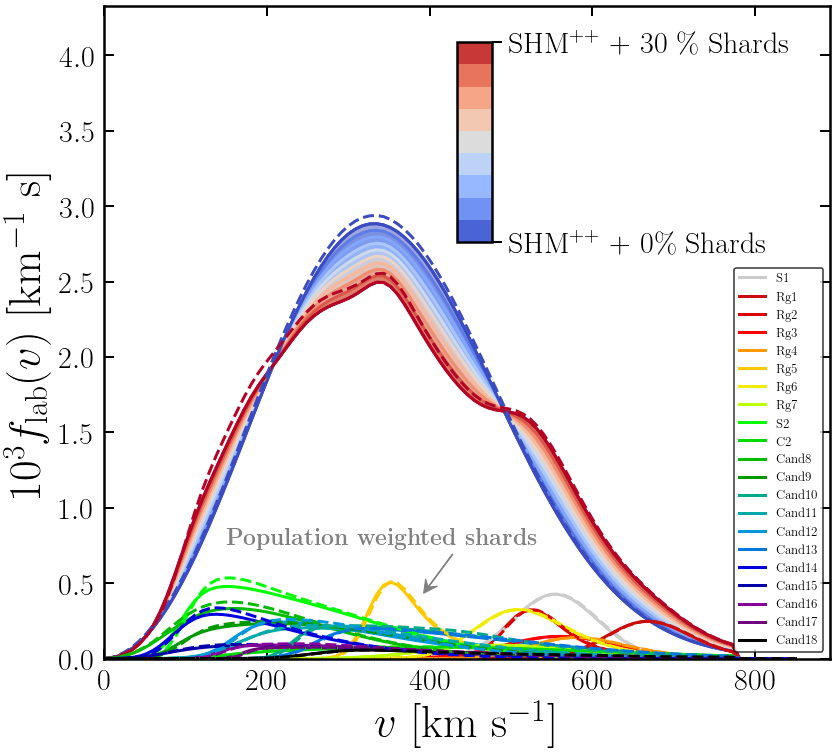

In [4]:
# Figure setup
fig = plt.figure(figsize=(13,12))
ax = fig.add_subplot(111)
pltname = 'Shards_fv_GravFocus'

fv0 = fv_Iso

n_xi = 10
xi_vals = linspace(0,0.5,n_xi)
col = (cm.coolwarm(linspace(0,1,n_xi)))
cmap = cm.coolwarm
y2 = 1e3*(xi_vals[-1]*sum(fv,0)+(1.0-xi_vals[-1])*fv0)
for i in range(0,n_xi):
    plt.fill_between(v,1e3*(xi_vals[i]*sum(fv,0)+(1.0-xi_vals[i])*fv0),y2=y2,color=col[i,:],alpha=0.5)
    plt.plot(v,1e3*(xi_vals[i]*sum(fv,0)+(1.0-xi_vals[i])*fv0),'-',color=col[i,:],linewidth=3)
    
cbar_max = r'SHM$^{++}$ + 30 \% Shards'
cbar_min = r'SHM$^{++}$ + 0\% Shards'
plt.plot(v,1e3*fv0,'-',color=col[0,:],linewidth=3)
plt.plot(v,y2,'-',color=col[-1,:],linewidth=3)

plt.plot(v,1e3*fv_Iso_gf,'--',color=col[0,:],linewidth=3)
plt.plot(v,1e3*(xi_vals[-1]*sum(fv_gf,0)+(1.0-xi_vals[-1])*fv_Iso_gf),'--',color=col[-1,:],linewidth=3)


# Plot individual streams
colstrs = flipud(cm.nipy_spectral(linspace(0.0,1.0,nshards)))
for i in range(0,nshards):
    plt.plot(v,1e3*fv[i,:],color=colstrs[i,:],linewidth=3,label=names[i])
for i in range(0,nshards):
    plt.plot(v,1e3*fv_gf[i,:],'--',color=colstrs[i,:],linewidth=3)
leg = plt.legend(loc='lower right',fontsize=13,edgecolor='k')
leg.get_frame().set_linewidth(1.5)
    
# Plot fiddling
ax.set_xlim(left=0.0)
ax.set_ylim(bottom=0.0,top=max(1e3*fv_Iso)*1.5)
ax.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=10,labelsize=30)
ax.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
plt.xlabel(r"$v$ [km s$^{-1}$]",fontsize=45);
plt.ylabel(r"$10^3 f_{\rm lab}(v)$ [km$^{-1}$ s]",fontsize=45);
plt.text(150,0.75,r'\bf {Population weighted shards}',fontsize=23,color='gray')
plt.arrow(0.48, 0.16, -0.04, -0.06, transform=ax.transAxes,length_includes_head=True,head_width=0.02, head_length=0.02, overhang=0.4,edgecolor='gray',facecolor='gray')

# Custom colorbar
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbaxes = inset_axes(ax, width="5%", height="50%", bbox_to_anchor=[-190, 330, 700, 400]) 
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cbaxes,ticks=(0,1),boundaries=linspace(0,1,n_xi))
f = plt.gcf().get_children()
cbar = f[2]
cbar.set_yticklabels([cbar_min, cbar_max])  # vertically oriented colorbar
cbar.tick_params(labelsize=30) 
cbar.tick_params(which='major',direction='out',width=2,length=10,right=True,top=False,pad=7)
cbar.tick_params(which='minor',direction='out',width=2,length=7,right=True,top=False)


# Save figure
plt.show()
#fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
#fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')

In [5]:
# DM params
A = Xe131.MassNumber
m_chi = 20.0
sigma_p = 1.0e-45

# Energy range
n = 500
E_th = 0.0001
E_max = 50.0
E = linspace(E_th,E_max,n)
v_min = MinimumWIMPSpeed(E,A,m_chi)

# Loop over times
ndays = 10
days = linspace(0,365,ndays)
gmin0 = zeros(shape=(ndays,n))
gmin0_gf = zeros(shape=(ndays,n))

for i in range(0,ndays):
    gmin0[i,:] = gvmin_Isotropic(v_min,days[i])
    gmin0_gf[i,:] = gvmin_Isotropic(v_min,days[i],GravFocus=True)
    print i

TypeError: LabVelocitySimple() got an unexpected keyword argument 'v_shift'

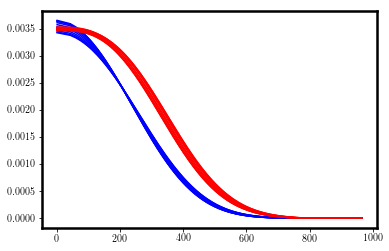

In [19]:
dv = append(v_min[1:]-v_min[0:-1],0.0)
for i in range(0,ndays):
    plt.plot(v_min,gmin0[i,:],'b-')
    
for i in range(0,ndays):
    plt.plot(v_min,gmin0_gf[i,:],'r-')
plt.show()

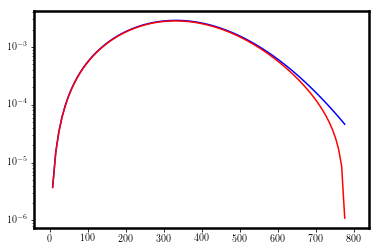

In [53]:
v = linspace(0.0,800,100)
v_lab = LabFuncs.LabVelocitySimple(day)

fv1 = SpeedDist_Isotropic(v,day)
fv2 = SpeedDist_3D(v,v_lab,array([1.0,1.0,1.0])*233.0/sqrt(2.0))

plt.semilogy(v,fv1,'b-')
plt.semilogy(v,fv2,'r-')
plt.show()